In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
#Import cleaned csv file
cleaned_df=pd.read_csv('/Users/robertpatton/Desktop/Desktop - Robert’s MacBook Pro/D212/Task 3/cleaned_presc.csv')

In [3]:
#Examine cleaned data
cleaned_df.head()

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
#Shape of dataframe
cleaned_df.shape

(7501, 119)

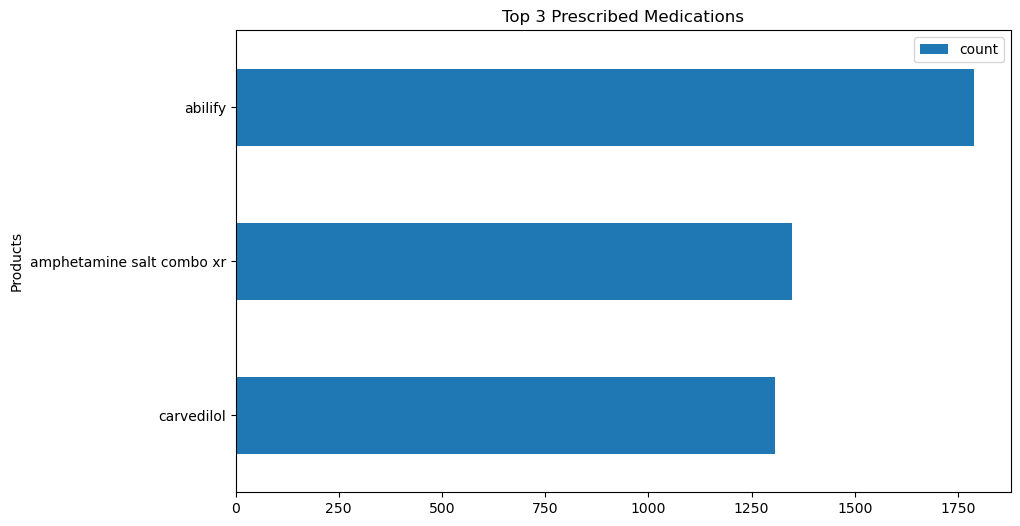

In [12]:
#Find top three most common medications prescribed
count=cleaned_df.loc[:,:].sum()
com_presc=count.sort_values(0, ascending=False).head(3)
com_presc= com_presc.to_frame()
com_presc= com_presc.reset_index()
com_presc= com_presc.rename(columns= {'index': 'Products', 0:'count'})
#Visualize data
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
ax= com_presc.plot.barh(x= 'Products', y= 'count')
plt.title('Top 3 Prescribed Medications')
plt.gca().invert_yaxis()

In [6]:
#Create apriori support rule
rules=apriori(cleaned_df, min_support= 0.02, use_colnames= True)
rules

,support,itemsets
0,0.046794,(Premarin)
1,0.238368,(abilify)
2,0.020397,(albuterol aerosol)
3,0.033329,(allopurinol)
4,0.079323,(alprazolam)
...,...,...
98,0.023064,"(lisinopril, diazepam)"
99,0.023464,"(diazepam, losartan)"
100,0.022930,"(metoprolol, diazepam)"
101,0.020131,"(doxycycline hyclate, glyburide)"


In [7]:
#Create a rules table for data frame
rul_table= association_rules(rules, metric='lift', min_threshold= 1)
rul_table.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(amlodipine),(abilify),0.071457,0.238368,0.023597,0.330224,1.385352,0.006564,1.137144,0.299568
1,(abilify),(amlodipine),0.238368,0.071457,0.023597,0.098993,1.385352,0.006564,1.030562,0.365218
2,(abilify),(amphetamine salt combo),0.238368,0.068391,0.024397,0.102349,1.496530,0.008095,1.037830,0.435627
3,(amphetamine salt combo),(abilify),0.068391,0.238368,0.024397,0.356725,1.496530,0.008095,1.183991,0.356144
4,(amphetamine salt combo xr),(abilify),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
5,(abilify),(amphetamine salt combo xr),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
6,(abilify),(atorvastatin),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850,0.467950
7,(atorvastatin),(abilify),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465
8,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
9,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437


In [8]:
#Sort with multi metric rules for top 3
sorted_rules=rul_table[(rul_table['lift']> 1.9) & (rul_table['confidence'] > 0.3)].sort_values(by= ['lift'], ascending=False)
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
74,(lisinopril),(carvedilol),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
73,(glipizide),(carvedilol),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186
30,(metformin),(abilify),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221


In [9]:
#Confirm counts for diazepam as antecedent in final rules set
rul_table.antecedents.value_counts()

(abilify)                      18
(carvedilol)                   12
(amphetamine salt combo xr)     9
(diazepam)                      8
(atorvastatin)                  7
(glyburide)                     6
(metoprolol)                    5
(lisinopril)                    4
(doxycycline hyclate)           4
(losartan)                      4
(citalopram)                    4
(glipizide)                     2
(amphetamine salt combo)        2
(amlodipine)                    2
(dextroamphetamine XR)          1
(clopidogrel)                   1
(fenofibrate)                   1
(levofloxacin)                  1
(metformin)                     1
(cialis)                        1
(naproxen)                      1
Name: antecedents, dtype: int64

In [10]:
#Observe counts for diazepam as consequent in final set rules
rul_table.consequents.value_counts()

(abilify)                      18
(carvedilol)                   12
(amphetamine salt combo xr)     9
(diazepam)                      8
(atorvastatin)                  7
(glyburide)                     6
(metoprolol)                    5
(doxycycline hyclate)           4
(lisinopril)                    4
(losartan)                      4
(citalopram)                    4
(amlodipine)                    2
(amphetamine salt combo)        2
(glipizide)                     2
(dextroamphetamine XR)          1
(levofloxacin)                  1
(clopidogrel)                   1
(metformin)                     1
(naproxen)                      1
(cialis)                        1
(fenofibrate)                   1
Name: consequents, dtype: int64

In [11]:
#Look at diazepam transactions
ant_df = rul_table[rul_table['antecedents'] == {'diazepam'}]
con_df = rul_table[rul_table['consequents'] == {'diazepam'}]
diazepam_df = pd.concat([ant_df, con_df])
diazepam_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
18,(diazepam),(abilify),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
47,(diazepam),(amphetamine salt combo xr),0.163845,0.179709,0.033196,0.202604,1.127397,0.003751,1.028711,0.135143
58,(diazepam),(atorvastatin),0.163845,0.129583,0.032129,0.196094,1.513276,0.010898,1.082736,0.405645
68,(diazepam),(carvedilol),0.163845,0.174110,0.039195,0.239219,1.373952,0.010668,1.085581,0.325505
82,(diazepam),(glyburide),0.163845,0.170911,0.034395,0.209927,1.228284,0.006393,1.049383,0.222275
85,(diazepam),(lisinopril),0.163845,0.098254,0.023064,0.140765,1.432669,0.006965,1.049476,0.361180
86,(diazepam),(losartan),0.163845,0.132116,0.023464,0.143206,1.083943,0.001817,1.012944,0.092617
89,(diazepam),(metoprolol),0.163845,0.095321,0.022930,0.139951,1.468215,0.007312,1.051893,0.381390
19,(abilify),(diazepam),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
46,(amphetamine salt combo xr),(diazepam),0.179709,0.163845,0.033196,0.184718,1.127397,0.003751,1.025603,0.137757
